In [7]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

The following plots demonstrate samples from a Gaussian process prior and the corresponding covariance matrix


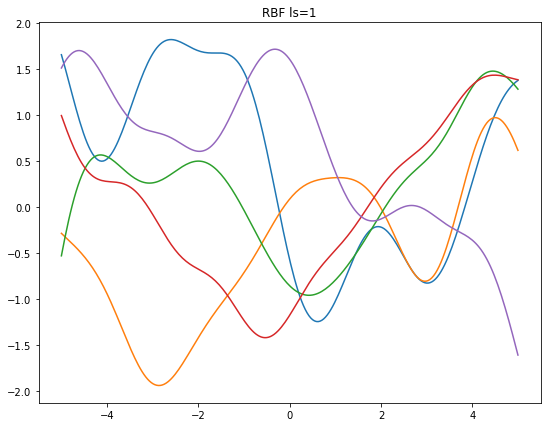

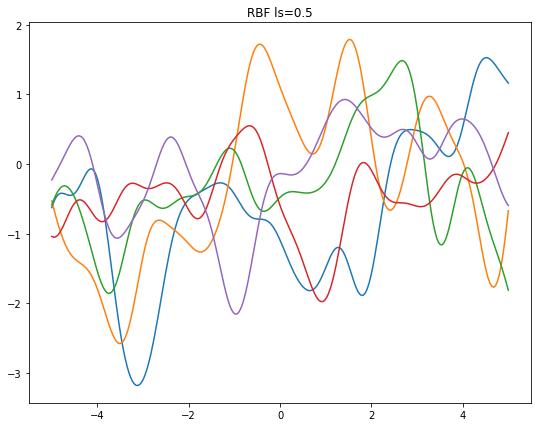

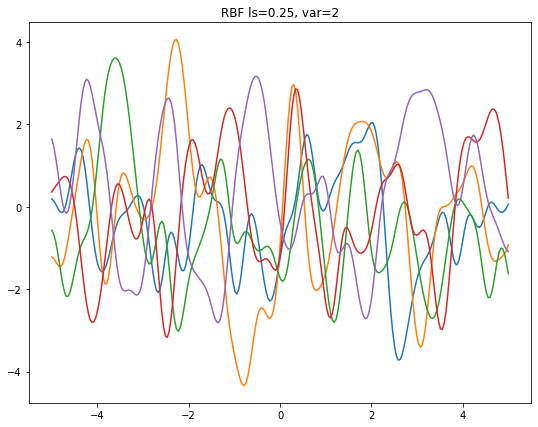

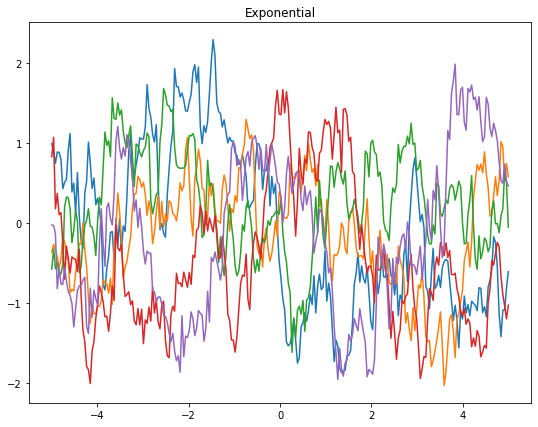

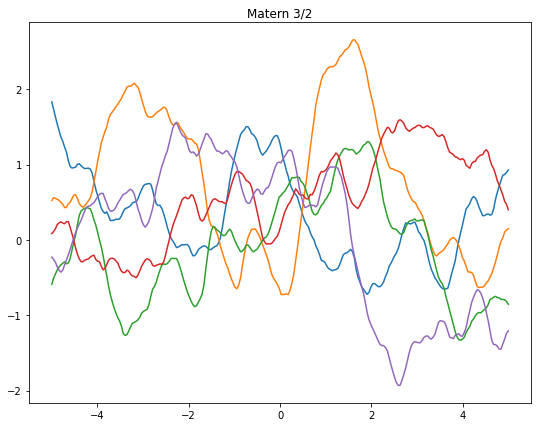

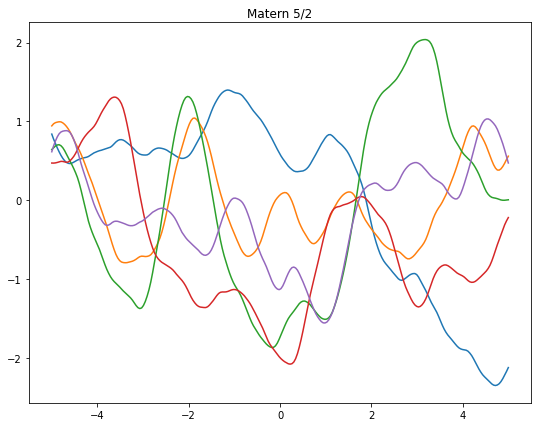

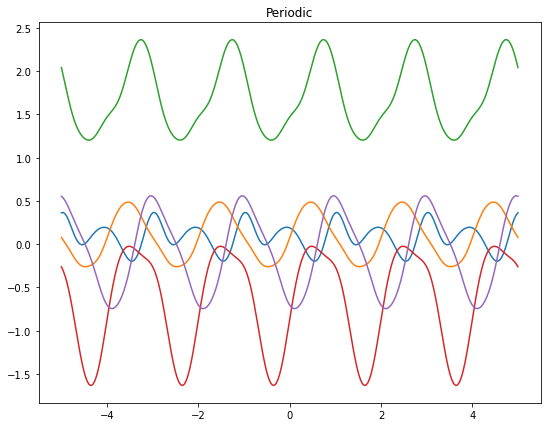

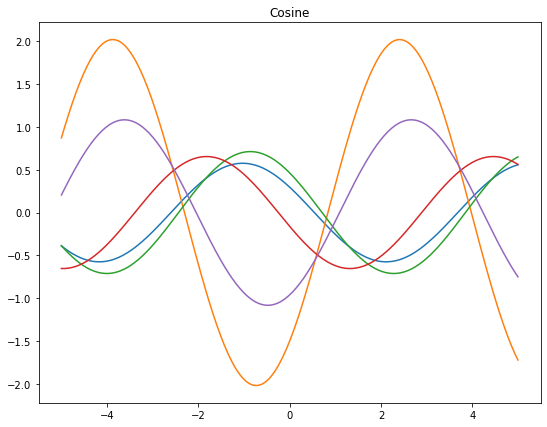

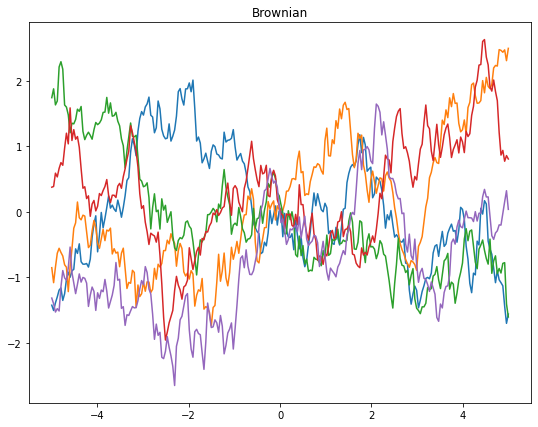

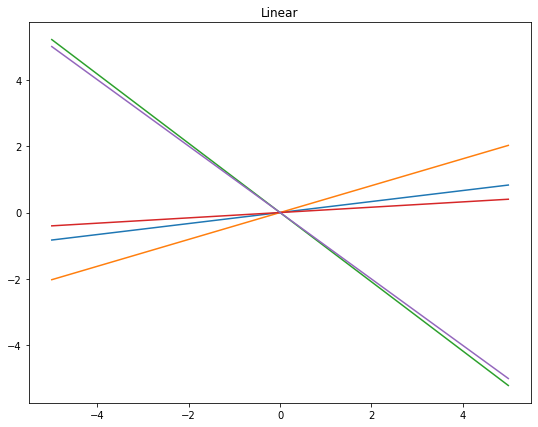

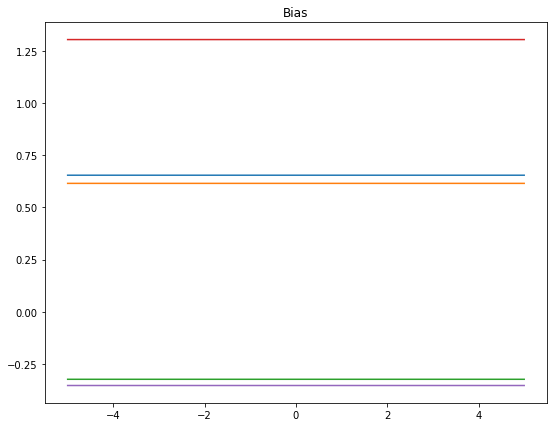

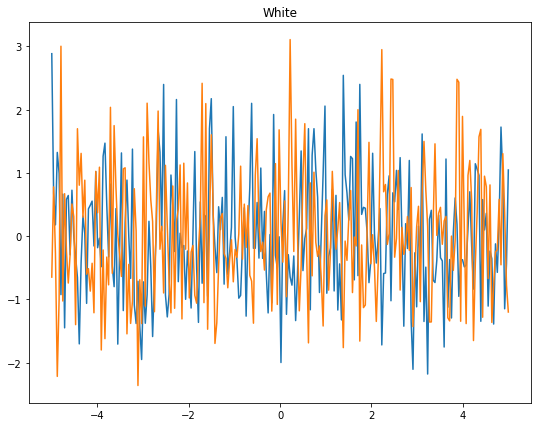

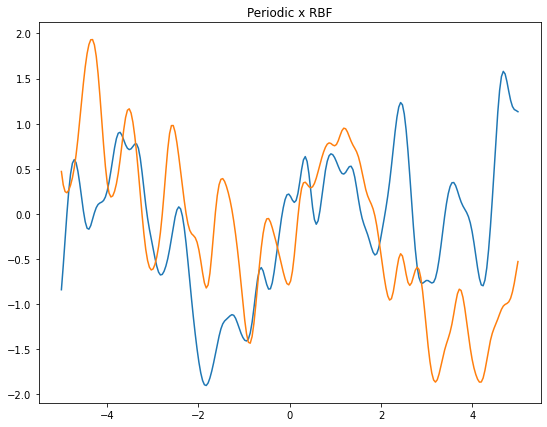

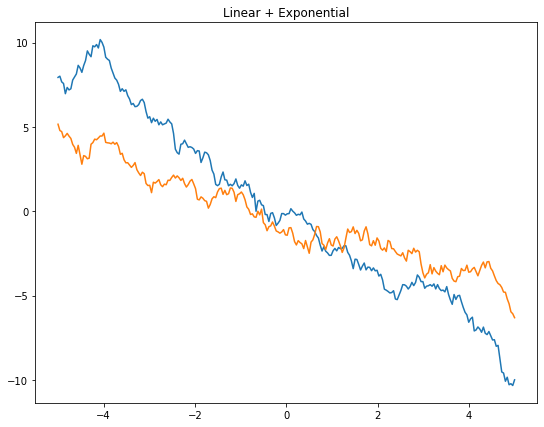

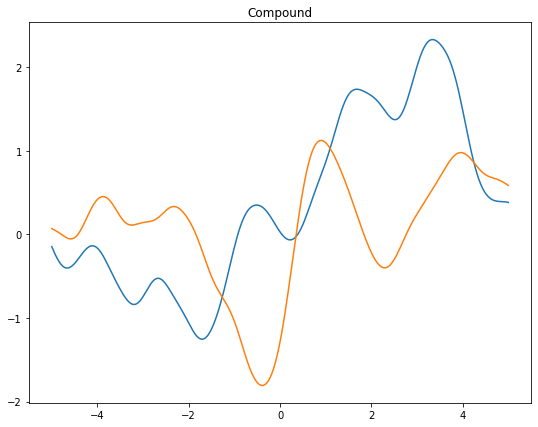

In [8]:
ks = [ # List of example kernels
    GPy.kern.RBF(1, lengthscale=1.),
    GPy.kern.RBF(1, lengthscale=0.5),
    GPy.kern.RBF(1, lengthscale=0.25, variance=2.),
    GPy.kern.Exponential(1),
    GPy.kern.Matern32(1),
    GPy.kern.Matern52(1),
    GPy.kern.StdPeriodic(1, period=2.),
    GPy.kern.Cosine(1),
    GPy.kern.Brownian(1),
    GPy.kern.Linear(1),
    GPy.kern.Bias(1),
    GPy.kern.White(1),
    GPy.kern.StdPeriodic(1)*GPy.kern.RBF(1),
    GPy.kern.Linear(1) + GPy.kern.Exponential(1),
    GPy.kern.RatQuad(1) + GPy.kern.White(1)
]
# The name of our kernels (for the legend)
kernel_name = ["RBF ls=1", "RBF ls=0.5", "RBF ls=0.25, var=2", "Exponential", "Matern 3/2",
               "Matern 5/2", "Periodic", "Cosine", "Brownian", "Linear", "Bias", "White", "Periodic x RBF", "Linear + Exponential", "Compound"]

# Our sample space
X = np.linspace(-5., 5., 250)[:, None]

print("The following plots demonstrate samples from a Gaussian process prior and the corresponding covariance matrix")

# Loop through our kernels
for i,k in enumerate(ks):
    # The mean function is set to 0
    mu = np.zeros((250)) # we have 250 sample inputs
    # Get the covariance matrix
    if i is not 11:
        C  = k.K(X,X)
    else: # We have to sample White noise kernel differently
        C = k.K(X)

    # Sample 5 times from a multivariate Gaussian distribution with mean 0 and covariance k(X,X)
    Z  = np.random.multivariate_normal(mu, C, 5)

    # Setup figure environment
    plt.figure(figsize=(9, 7))

    for j in range(5 if i < 11 else 2): # Loop through samples
        plt.plot(X[:],Z[j,:])
        plt.title(kernel_name[i])

The following plots demonstrate samples from a Gaussian process prior and the corresponding covariance matrix


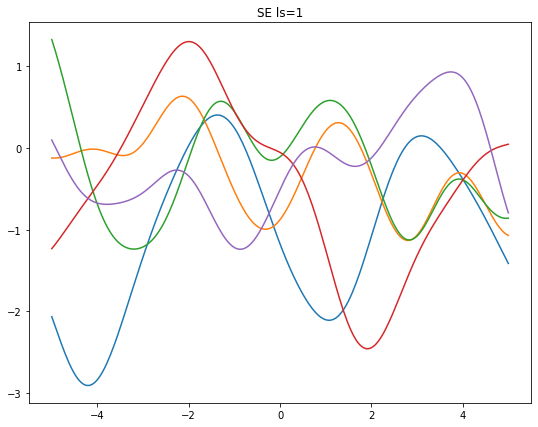

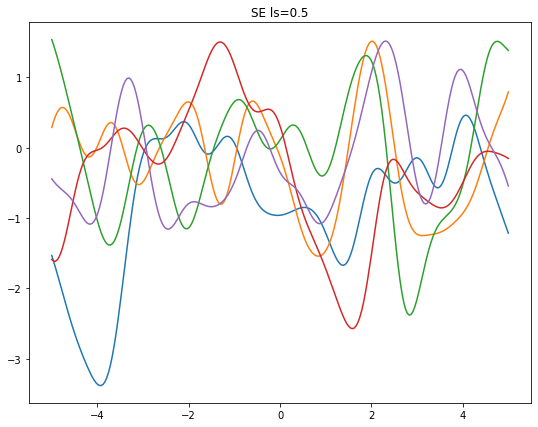

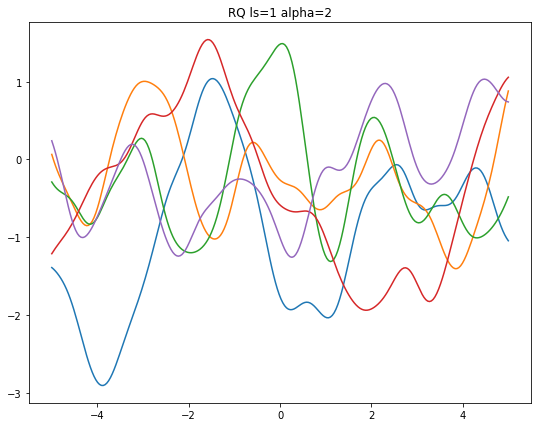

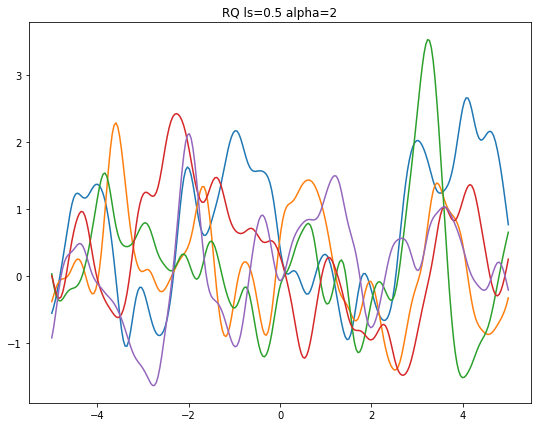

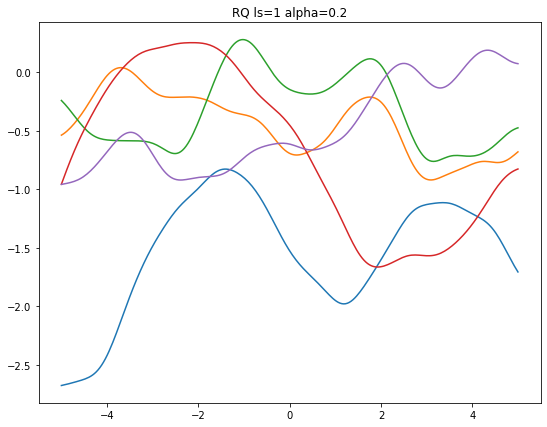

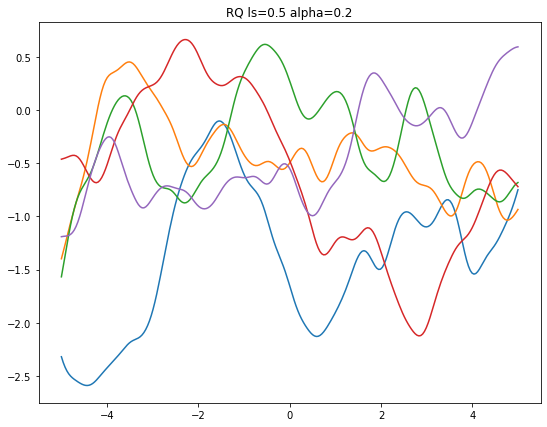

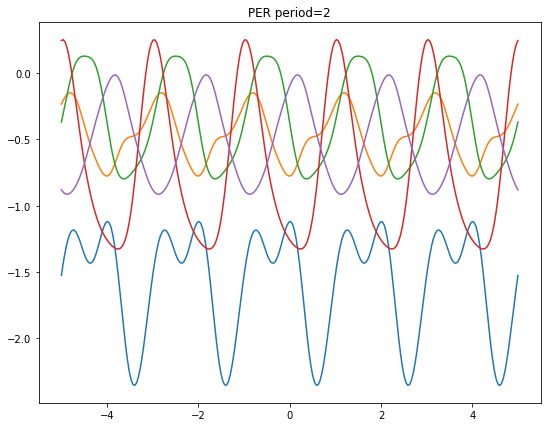

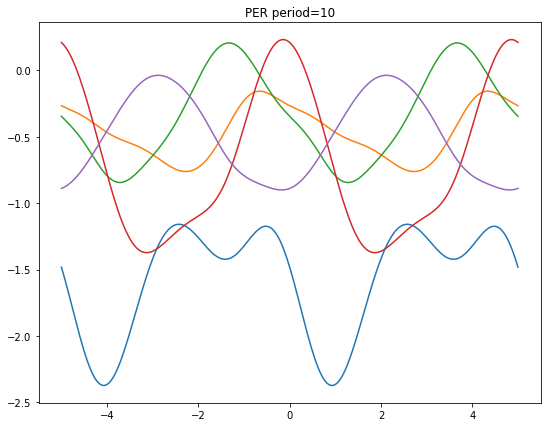

In [9]:
ks = [ # List of example kernels
    GPy.kern.RBF(1, lengthscale=1.),
    GPy.kern.RBF(1, lengthscale=0.5),
    GPy.kern.RatQuad(1, lengthscale=1., power=2),
    GPy.kern.RatQuad(1, lengthscale=0.5, power=2),
    GPy.kern.RatQuad(1, lengthscale=1., power=0.2),
    GPy.kern.RatQuad(1, lengthscale=0.5, power=0.2),
    GPy.kern.StdPeriodic(1, period=2.),
    GPy.kern.StdPeriodic(1, period=5.)
]
# The name of our kernels (for the legend)
kernel_name = ["SE ls=1", "SE ls=0.5", "RQ ls=1 alpha=2", "RQ ls=0.5 alpha=2", "RQ ls=1 alpha=0.2", "RQ ls=0.5 alpha=0.2", "PER period=2", "PER period=10"]

# Our sample space
X = np.linspace(-5., 5., 250)[:, None]

print("The following plots demonstrate samples from a Gaussian process prior and the corresponding covariance matrix")

# Loop through our kernels
for i,k in enumerate(ks):
    # The mean function is set to 0
    mu = np.zeros((250)) # we have 250 sample inputs
    # Get the covariance matrix
    if i is not 11:
        C  = k.K(X,X)
    else: # We have to sample White noise kernel differently
        C = k.K(X)

    # Sample 5 times from a multivariate Gaussian distribution with mean 0 and covariance k(X,X)
    np.random.seed(0)
    Z  = np.random.multivariate_normal(mu, C, 5)

    # Setup figure environment
    plt.figure(figsize=(9, 7))

    for j in range(5 if i < 11 else 2): # Loop through samples
        plt.plot(X[:],Z[j,:])
        plt.title(kernel_name[i])